In [1]:
using Plots
using Statistics
using JLD2
using Base.Threads
using ITensors
using Distributions, Random
include("../utils.jl");

In [2]:
mps0 = load_mps_from_h5("mps0.h5", "mps0");

In [3]:
@load "training_data.jld2"

2-element Vector{Symbol}:
 :X_train_scaled
 :y_train

In [4]:
X_train_scaled

4500×100 Matrix{Float64}:
 0.428029  0.400668  0.375429  0.352715  …  0.486942  0.456993  0.428029
 0.318456  0.379392  0.46184   0.551839     0.279159  0.28482   0.318456
 0.30261   0.279451  0.284178  0.316871     0.429255  0.353643  0.30261
 0.295557  0.307593  0.322742  0.340947     0.280851  0.286646  0.295557
 0.721637  0.721351  0.717975  0.711496     0.712932  0.718835  0.721637
 0.412392  0.341151  0.295666  0.278165  …  0.587894  0.500167  0.412392
 0.285122  0.293353  0.30471   0.319185     0.277975  0.280001  0.285122
 0.7045    0.721703  0.711042  0.672368     0.588291  0.659301  0.7045
 0.280166  0.285427  0.2938    0.305298     0.278922  0.278     0.280166
 0.343016  0.414961  0.503011  0.590443     0.27829   0.296666  0.343016
 ⋮                                       ⋱                      
 0.707906  0.665904  0.597564  0.511058     0.708021  0.721894  0.707906
 0.476856  0.391967  0.326816  0.288491     0.642973  0.566351  0.476856
 0.526869  0.496671  0.466548  0.437

In [5]:
class_0_idxs = findall(x -> x .== 0, y_train);
class_1_idxs = findall(x -> x .== 1, y_train);

In [6]:
class_0_samples = X_train_scaled[class_0_idxs, :]
class_1_samples = X_train_scaled[class_1_idxs, :];

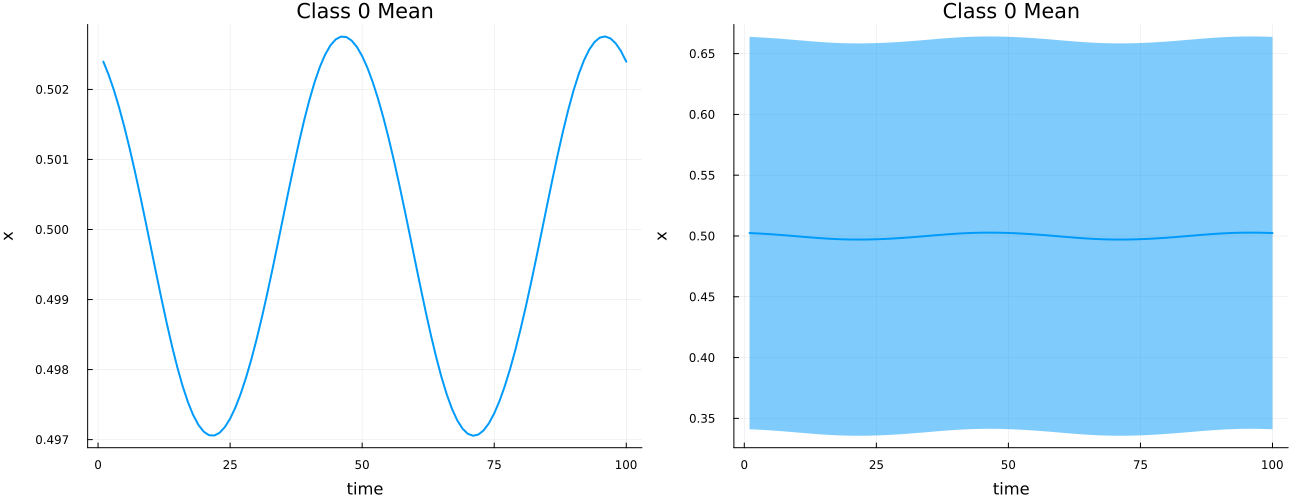

In [60]:
p1 = plot(mean(class_0_samples, dims=1)[1, :], label="", xlabel="time", ylabel="x", title="Class 0 Mean", lw=2)
p2 = plot(mean(class_0_samples, dims=1)[1, :], ribbon=std(class_0_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 0 Mean", lw=2)
plot(p1, p2, size=(1300, 500), bottom_margin=5mm, left_margin=5mm)
#savefig("class0_training_mean_and_std.svg")

In [62]:
mps = deepcopy(mps0);

In [63]:
corr_mat = correlation_matrix(mps, [1 0; 0 -1], [1 0; 0 -1]);

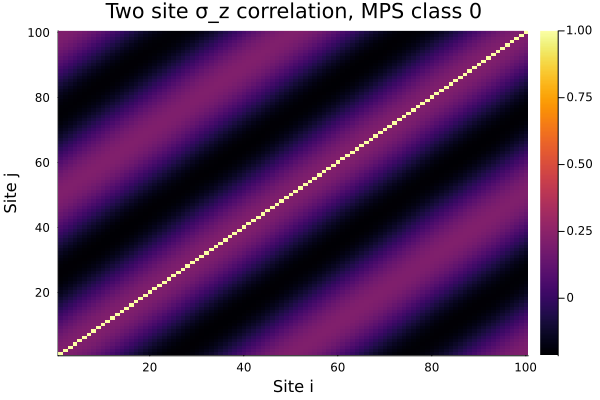

In [240]:
heatmap(real(corr_mat), xlabel="Site i", ylabel="Site j", title="Two site σ_z correlation, MPS class 0", colorbar_title="")
#savefig("two_site_correlator_pauli_z_class0mps.svg")

In [139]:
samps01 = Matrix{Float64}(undef, 5000, 100);
samps02 = Matrix{Float64}(undef, 5000, 100);
samps05 = Matrix{Float64}(undef, 5000, 100);
samps10 = Matrix{Float64}(undef, 5000, 100);

In [140]:
@threads for i in 1:5000
    samp01 = generate_sample(mps; dx=0.1)
    samps01[i, :] = samp01
    samp02 = generate_sample(mps; dx=0.2)
    samps02[i, :] = samp02
    samp05 = generate_sample(mps; dx=0.5)
    samps05[i, :] = samp05
    samp10 = generate_sample(mps; dx=1.0) # either 0 or 1
    samps10[i, :] = samp10
end

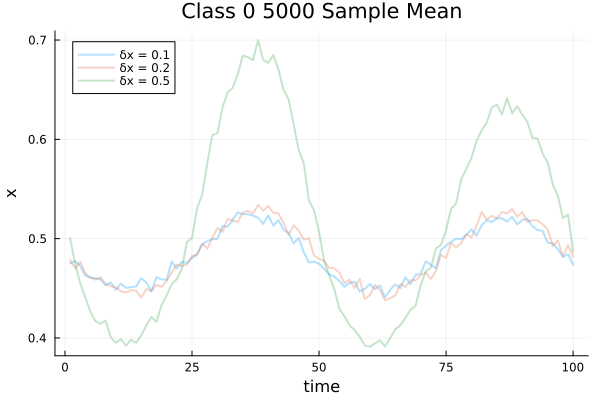

In [164]:
p1 = plot(mean(samps01, dims=1)[1,:], label="δx = 0.1", lw=2, xlabel="time", ylabel="x", alpha=0.3)
plot!(mean(samps02, dims=1)[1,:], label="δx = 0.2", lw=2, alpha=0.3)
plot!(mean(samps05, dims=1)[1,:], label="δx = 0.5", lw=2, alpha=0.3)
title!("Class 0 5000 Sample Mean")
#savefig("class_0_mps_5000_sample_mean_wo_binary.svg")

In [173]:
mean(class_0_samples, dims=1)

1×100 Matrix{Float64}:
 0.502396  0.50221  0.50199  0.501738  …  0.502658  0.502546  0.502396

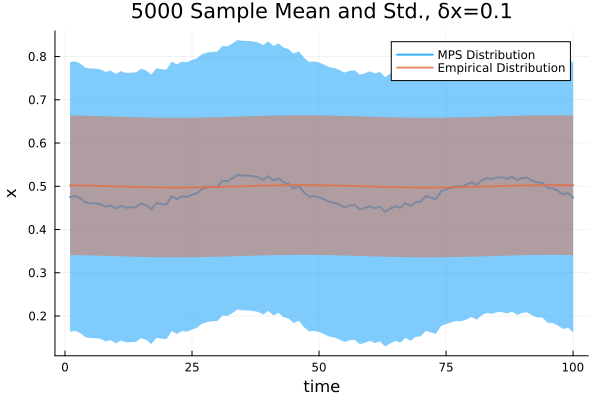

In [238]:
p1 = plot(mean(samps01, dims=1)[1,:], ribbon=std(samps01, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.1")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class0_mps_empirical_5000_01.svg")

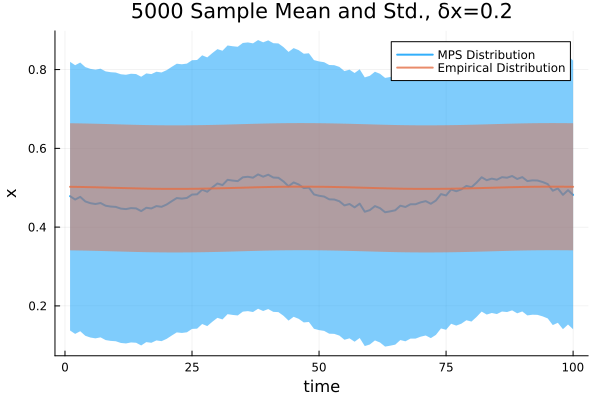

In [235]:
p1 = plot(mean(samps02, dims=1)[1,:], ribbon=std(samps02, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.2")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class0_mps_empirical_5000_02.svg")

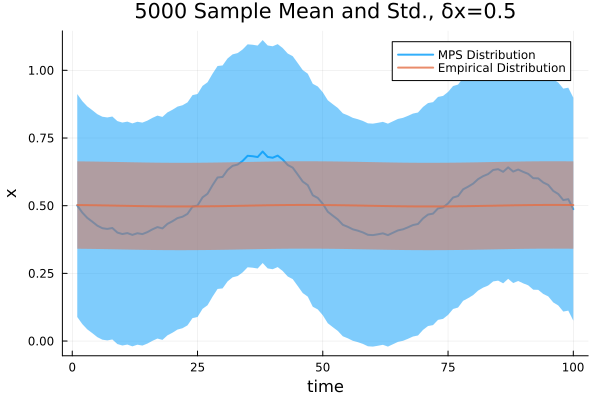

In [232]:
p1 = plot(mean(samps05, dims=1)[1,:], ribbon=std(samps05, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.5")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class0_mps_empirical_5000_05.svg")

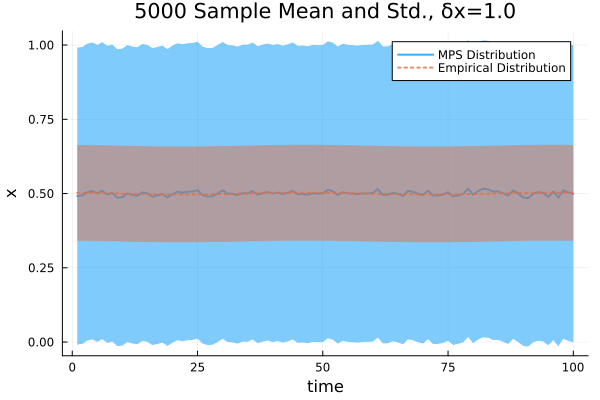

In [229]:
p1 = plot(mean(samps10, dims=1)[1,:], ribbon=std(samps10, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=1.0")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8, ls=:dot)
#savefig("class0_mps_empirical_5000_10.svg")

Also try finer resolution, dx = 0.01 and 0.001.

In [242]:
samps001 = Matrix{Float64}(undef, 5000, 100);

In [244]:
@threads for i in 1:5000
    samp001 = generate_sample(mps; dx=0.01)
    samps001[i, :] = samp001
end

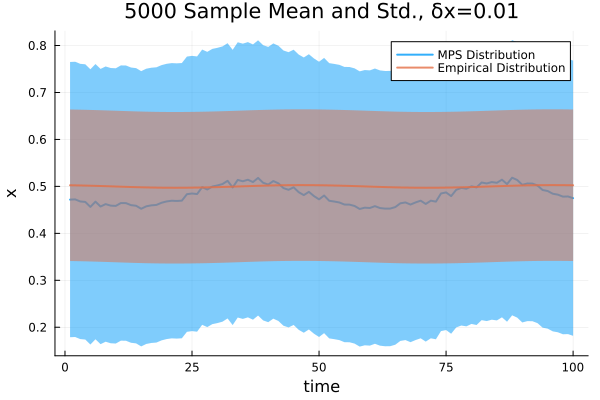

In [248]:
p1 = plot(mean(samps001, dims=1)[1,:], ribbon=std(samps001, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.01")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class0_mps_empirical_5000_001.svg")

In [249]:
samps0001 = Matrix{Float64}(undef, 5000, 100);

In [250]:
@threads for i in 1:5000
    samp0001 = generate_sample(mps; dx=0.001)
    samps0001[i, :] = samp0001
end

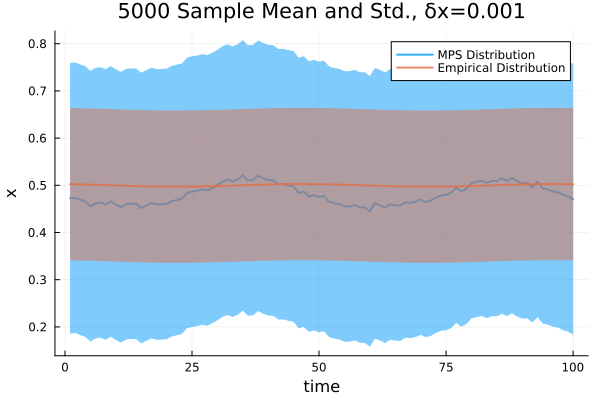

In [257]:
p1 = plot(mean(samps0001, dims=1)[1,:], ribbon=std(samps0001, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.001")
plot!(mean(class_0_samples, dims=1)[1,:], ribbon=std(class_0_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class0_mps_empirical_5000_0001.svg")

# Class 1

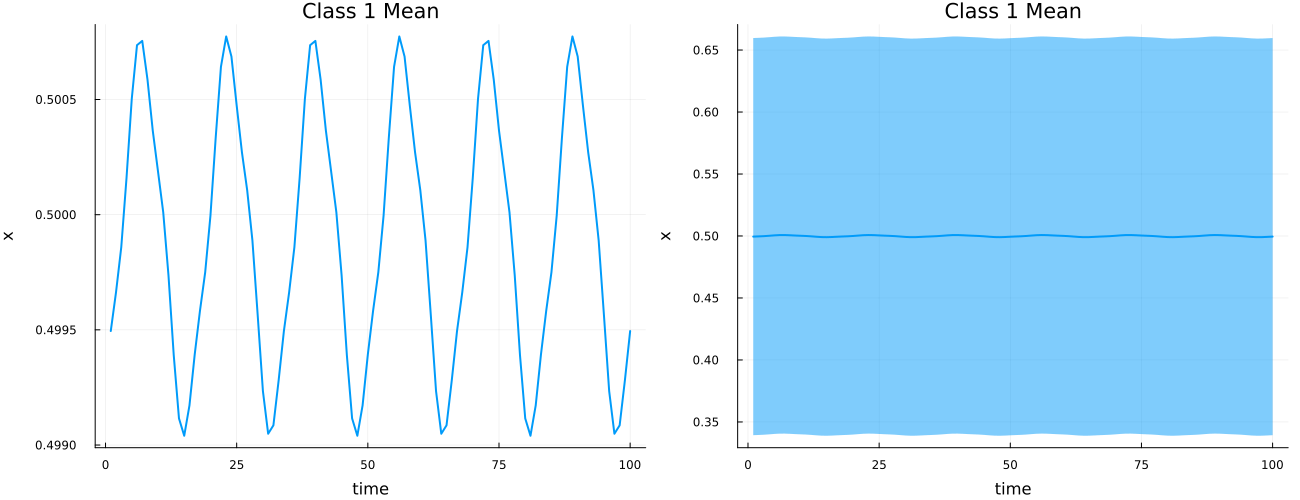

In [9]:
p1 = plot(mean(class_1_samples, dims=1)[1, :], label="", xlabel="time", ylabel="x", title="Class 1 Mean", lw=2)
p2 = plot(mean(class_1_samples, dims=1)[1, :], ribbon=std(class_1_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 1 Mean", lw=2)
plot(p1, p2, size=(1300, 500), bottom_margin=5mm, left_margin=5mm)
#savefig("class_1_empirical_mean_and_std.svg")

In [10]:
mps1 = load_mps_from_h5("mps1.h5", "mps1");

In [12]:
mps = deepcopy(mps1);

In [13]:
corr_mat = correlation_matrix(mps, [1 0; 0 -1], [1 0; 0 -1]);

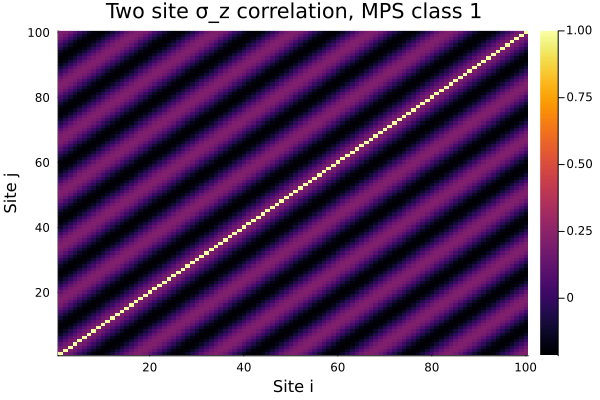

In [16]:
heatmap(real(corr_mat), xlabel="Site i", ylabel="Site j", title="Two site σ_z correlation, MPS class 1", colorbar_title="")
#savefig("two_site_correlator_pauli_z_mps1.svg")

In [17]:
samps01 = Matrix{Float64}(undef, 5000, 100);
samps02 = Matrix{Float64}(undef, 5000, 100);
samps05 = Matrix{Float64}(undef, 5000, 100);
samps10 = Matrix{Float64}(undef, 5000, 100);

In [18]:
@threads for i in 1:5000
    samp01 = generate_sample(mps; dx=0.1)
    samps01[i, :] = samp01
    samp02 = generate_sample(mps; dx=0.2)
    samps02[i, :] = samp02
    samp05 = generate_sample(mps; dx=0.5)
    samps05[i, :] = samp05
    samp10 = generate_sample(mps; dx=1.0) # either 0 or 1
    samps10[i, :] = samp10
end

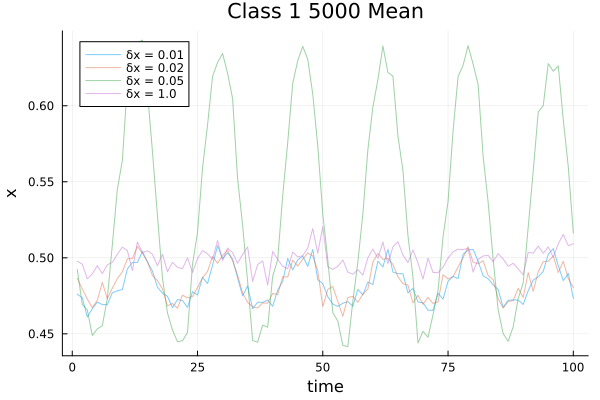

In [30]:
plot(mean(samps01, dims=1)[1,:], alpha=0.5, label="δx = 0.01", xlabel="time", ylabel="x", title="Class 1 5000 Mean")
plot!(mean(samps02, dims=1)[1,:], alpha=0.5, label="δx = 0.02")
plot!(mean(samps05, dims=1)[1,:], alpha=0.5, label="δx = 0.05")
plot!(mean(samps10, dims=1)[1,:], alpha=0.5, label="δx = 1.0")
#savefig("class1_training_mean_and_std.svg")

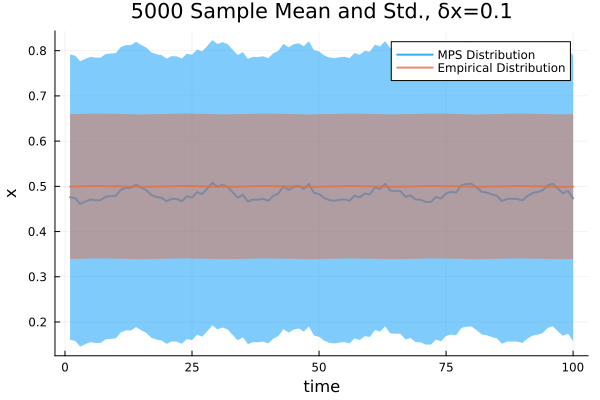

In [34]:
p1 = plot(mean(samps01, dims=1)[1,:], ribbon=std(samps01, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.1")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_5000_01.svg")

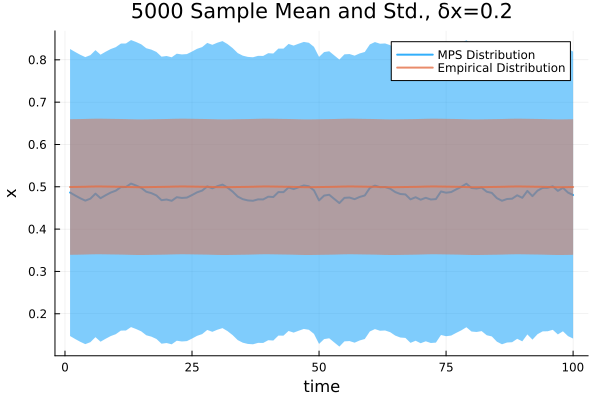

In [38]:
p1 = plot(mean(samps02, dims=1)[1,:], ribbon=std(samps02, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.2")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_5000_02.svg")

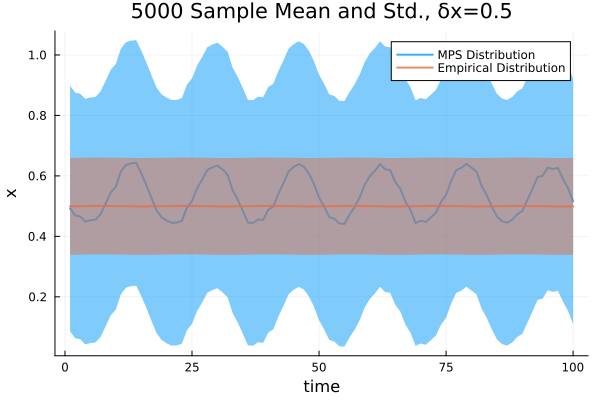

In [41]:
p1 = plot(mean(samps05, dims=1)[1,:], ribbon=std(samps05, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=0.5")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_5000_05.svg")

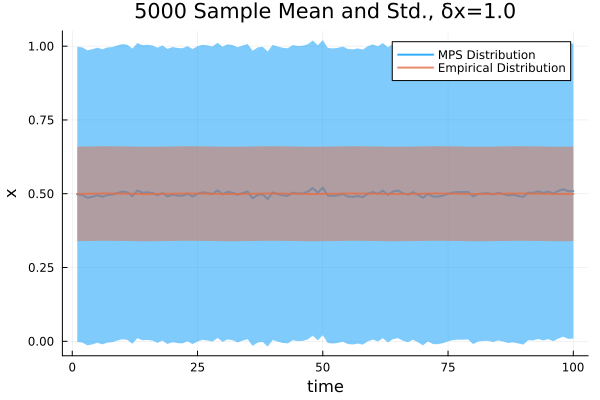

In [44]:
p1 = plot(mean(samps10, dims=1)[1,:], ribbon=std(samps10, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="5000 Sample Mean and Std., δx=1.0")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_5000_10.svg")

# Increasing the number of samples

In [46]:
samps01 = Matrix{Float64}(undef, 15000, 100);
@threads for i in 1:15000
    samp01 = generate_sample(mps; dx=0.1)
    samps01[i, :] = samp01
end

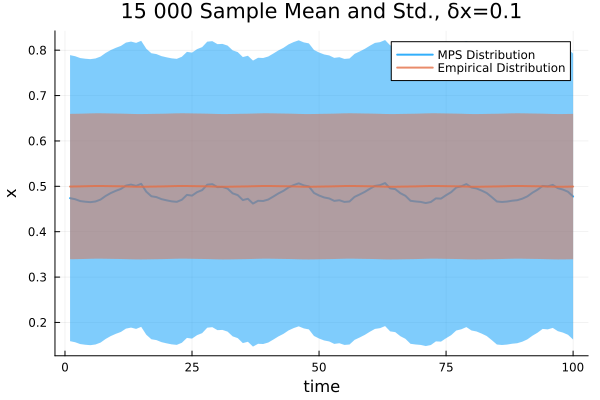

In [51]:
p1 = plot(mean(samps01, dims=1)[1,:], ribbon=std(samps01, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="15 000 Sample Mean and Std., δx=0.1")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_15_000_01.svg")

In [52]:
samps05 = Matrix{Float64}(undef, 15000, 100);
@threads for i in 1:15000
    samp05 = generate_sample(mps; dx=0.5)
    samps05[i, :] = samp05
end

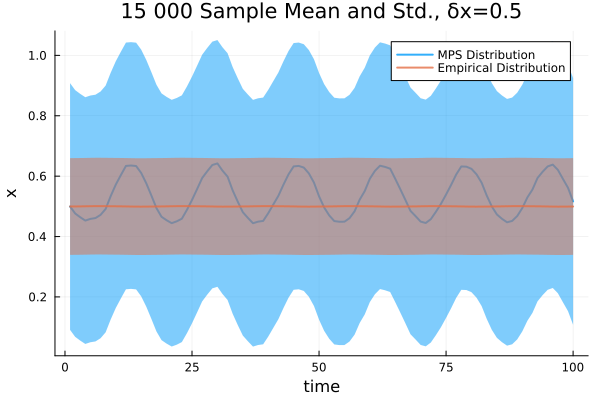

In [55]:
p1 = plot(mean(samps05, dims=1)[1,:], ribbon=std(samps05, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="15 000 Sample Mean and Std., δx=0.5")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)
#savefig("class1_mps_empirical_15_000_05.svg")

In [56]:
samps10 = Matrix{Float64}(undef, 15000, 100);
@threads for i in 1:15000
    samp10 = generate_sample(mps; dx=1.0)
    samps10[i, :] = samp10
end

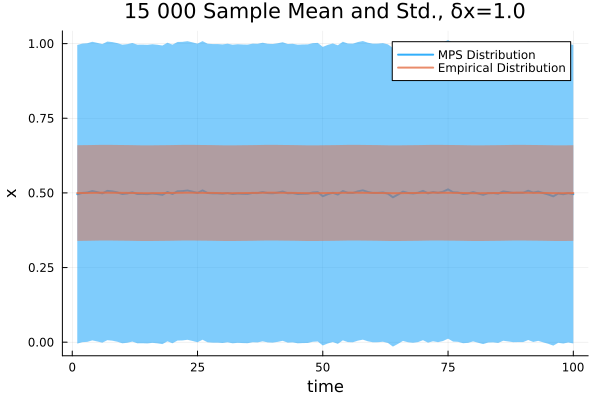

In [57]:
p1 = plot(mean(samps10, dims=1)[1,:], ribbon=std(samps10, dims=1), label="MPS Distribution", lw=2, xlabel="time", 
    ylabel="x", alpha=0.8, title="15 000 Sample Mean and Std., δx=1.0")
plot!(mean(class_1_samples, dims=1)[1,:], ribbon=std(class_1_samples, dims=1),label="Empirical Distribution", lw=2, alpha=0.8)

In [70]:
include("../utils.jl");

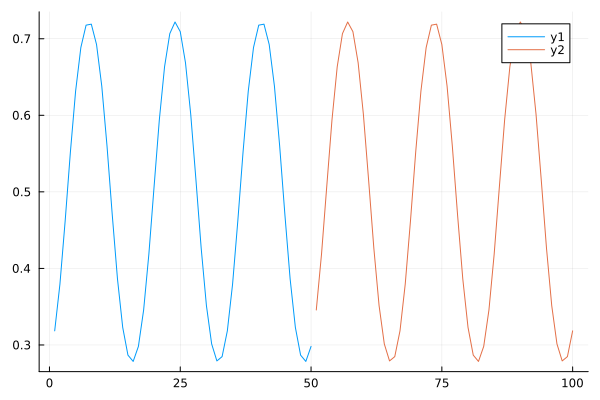

In [80]:
plot(collect(1:50),class_1_samples[1,1:50])
plot!(collect(51:100), class_1_samples[1,51:end])

In [117]:
mps1 = load_mps_from_h5("mps1.h5", "mps1");
mps = deepcopy(mps1);

In [118]:
interp_samps1000 = Matrix{Float64}(undef, 1000, 50);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:50], 51; dx=0.1);
    interp_samps1000[i, :] = samp
end

In [125]:
interp_samps5000 = Matrix{Float64}(undef, 5000, 50);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:50], 51; dx=0.1);
    interp_samps5000[i, :] = samp
end

In [128]:
interp_samps10000 = Matrix{Float64}(undef, 10_000, 50);
@threads for i in 1:10_000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:50], 51; dx=0.1);
    interp_samps10000[i, :] = samp
end

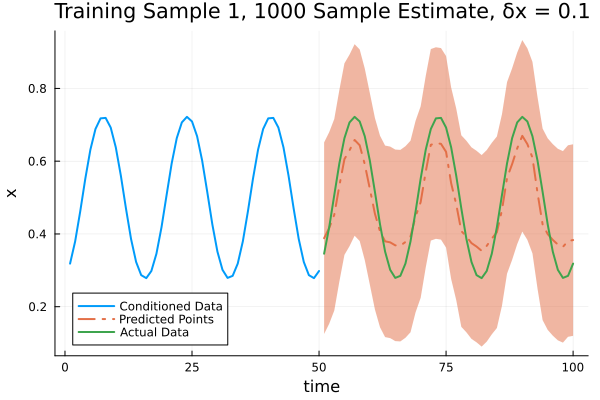

In [170]:
plot(collect(1:50), class_1_samples[1,1:50], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(51:100), mean(interp_samps1000, dims=1)[1,:], ribbon=std(interp_samps1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:100), class_1_samples[1, 51:100], label="Actual Data", lw=2)
xlabel!("time")
ylabel!("x")
#savefig("Class_1_Sample_1_1000_samp_est_forecast.svg")

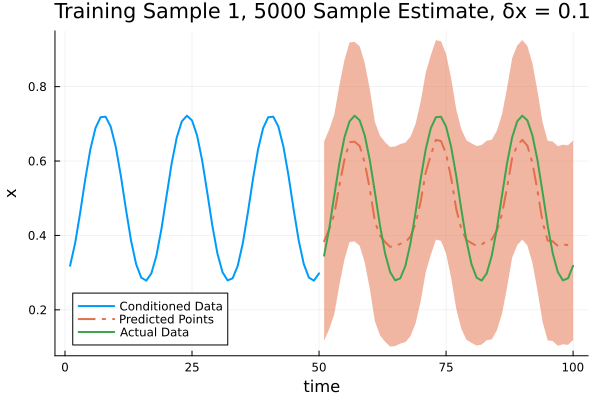

In [169]:
plot(collect(1:50), class_1_samples[1,1:50], lw=2, label="Conditioned Data", title="Training Sample 1, 5000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(51:100), mean(interp_samps5000, dims=1)[1,:], ribbon=std(interp_samps5000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:100), class_1_samples[1, 51:100], label="Actual Data", lw=2)
xlabel!("time")
ylabel!("x")
#savefig("Class_1_Sample_1_5000_samp_est_forecast.svg")

Feed in 75% of data

In [163]:
mps1 = load_mps_from_h5("mps1.h5", "mps1");
mps = deepcopy(mps1);

In [164]:
interp_samps75_1000 = Matrix{Float64}(undef, 1000, 25);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:75], 76; dx=0.1);
    interp_samps75_1000[i, :] = samp
end

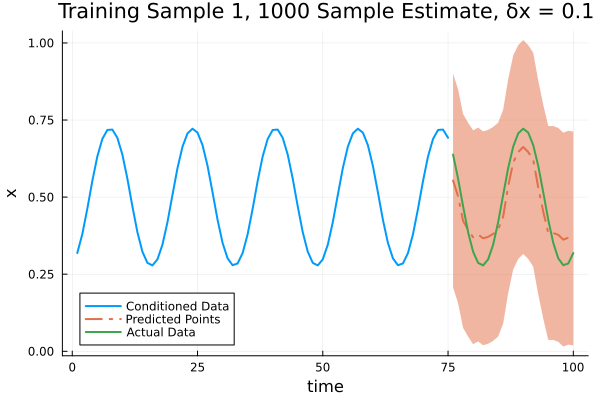

In [177]:
plot(collect(1:75), class_1_samples[1,1:75], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(76:100), mean(interp_samps75_1000, dims=1)[1,:], ribbon=std(interp_samps75_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(76:100), class_1_samples[1, 76:100], label="Actual Data", lw=2)
xlabel!("time")
ylabel!("x")
#savefig("Class_1_Sample_1_1000_samp_est_forecast_75percent.svg")

Feed in 25 percent of data

In [178]:
mps1 = load_mps_from_h5("mps1.h5", "mps1");
mps = deepcopy(mps1);

In [209]:
interp_samps25_1000 = Matrix{Float64}(undef, 1000, 75);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:25], 26; dx=0.1);
    interp_samps25_1000[i, :] = samp
end

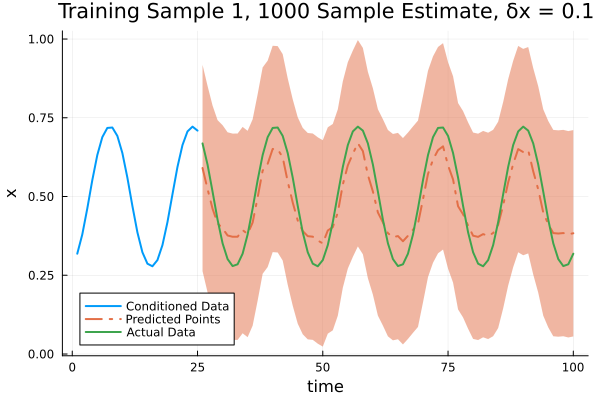

In [210]:
plot(collect(1:25), class_1_samples[1,1:25], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(26:100), mean(interp_samps25_1000, dims=1)[1,:], ribbon=std(interp_samps25_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(26:100), class_1_samples[1, 26:100], label="Actual Data", lw=2)
xlabel!("time")
ylabel!("x")
#savefig("Class_1_Sample_1_1000_samp_est_forecast_25percent_dx10.svg")

Feed in 5 percent of data

In [211]:
mps1 = load_mps_from_h5("mps1.h5", "mps1");
mps = deepcopy(mps1);

In [219]:
interp_samps10_1000 = Matrix{Float64}(undef, 1000, 90);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:10], 11; dx=0.1);
    interp_samps10_1000[i, :] = samp
end

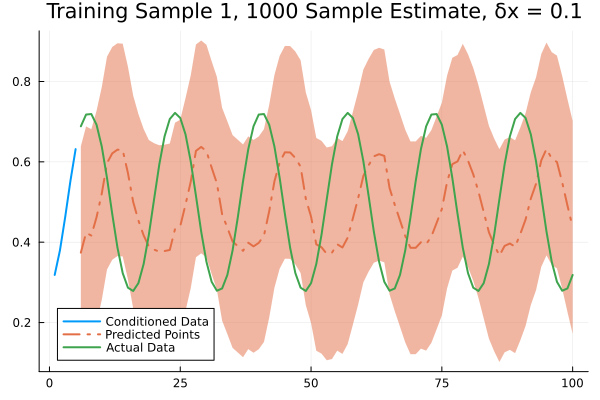

In [216]:
plot(collect(1:5), class_1_samples[1,1:5], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(6:100), mean(interp_samps5_1000, dims=1)[1,:], ribbon=std(interp_samps5_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(6:100), class_1_samples[1, 6:100], label="Actual Data", lw=2)
#savefig("Class_1_Sample_1_1000_samp_est_forecast_5percent_dx01.svg")

10 percent

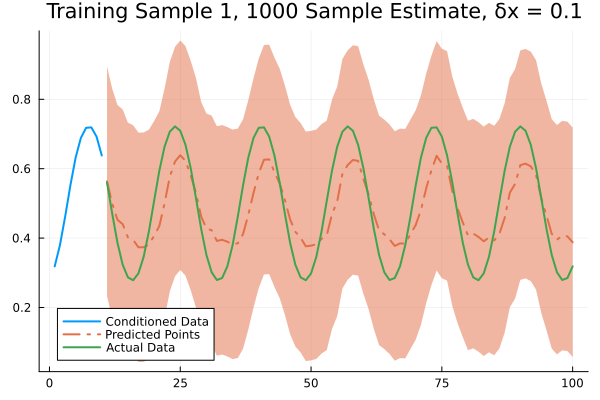

In [225]:
plot(collect(1:10), class_1_samples[1,1:10], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(11:100), mean(interp_samps10_1000, dims=1)[1,:], ribbon=std(interp_samps10_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(11:100), class_1_samples[1, 11:100], label="Actual Data", lw=2)
#savefig("Class_1_Sample_1_1000_samp_est_forecast_10percent_dx01.svg")

15 percent

In [222]:
interp_samps15_1000 = Matrix{Float64}(undef, 1000, 85);
@threads for i in 1:1000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[1,1:15], 16; dx=0.1);
    interp_samps15_1000[i, :] = samp
end

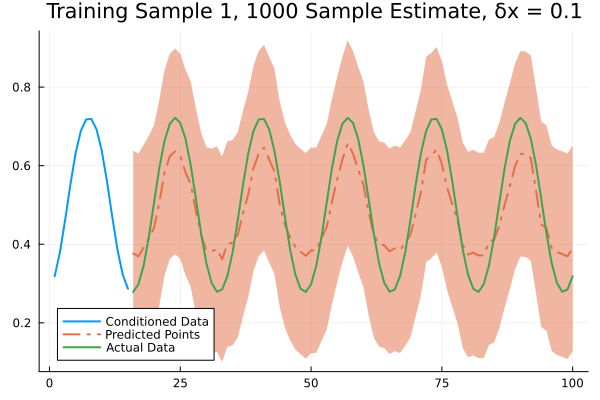

In [227]:
plot(collect(1:15), class_1_samples[1,1:15], lw=2, label="Conditioned Data", title="Training Sample 1, 1000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(16:100), mean(interp_samps15_1000, dims=1)[1,:], ribbon=std(interp_samps15_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(16:100), class_1_samples[1, 16:100], label="Actual Data", lw=2)
#savefig("Class_1_Sample_1_1000_samp_est_forecast_15percent_dx01.svg")

In [252]:
interp_samps50_1000 = Matrix{Float64}(undef, 5000, 50);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps), class_1_samples[153,1:50], 51; dx=0.1);
    interp_samps50_1000[i, :] = samp
end

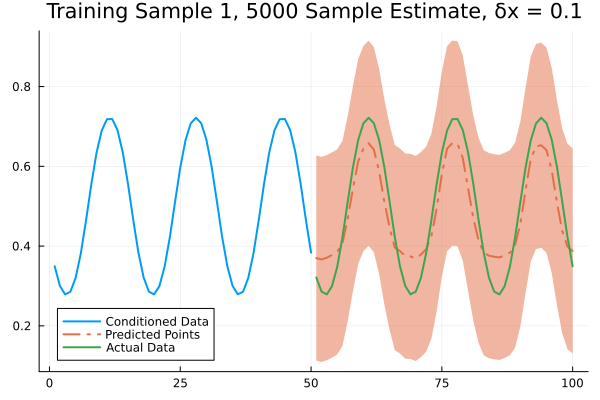

In [253]:
plot(collect(1:50), class_1_samples[153,1:50], lw=2, label="Conditioned Data", title="Training Sample 1, 5000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(51:100), mean(interp_samps50_1000, dims=1)[1,:], ribbon=std(interp_samps50_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(51:100), class_1_samples[153, 51:100], label="Actual Data", lw=2)

In [321]:
mps0 = load_mps_from_h5("mps0_25.h5", "mps0_25");
mps = deepcopy(mps0);

In [318]:
@load "testing_data.jld2"

2-element Vector{Symbol}:
 :X_test_scaled
 :y_test

In [309]:
class_1_test_idxs = findall(x -> x .== 1, y_test);
class_1_test_samples = X_test_scaled[class_1_test_idxs, :];

In [322]:
interp_samps50_1000 = Matrix{Float64}(undef, 5000, 30);
@threads for i in 1:5000
    samp = interpolate_sample(deepcopy(mps), class_0_test_samples[15,1:70], 71; dx=0.01);
    interp_samps50_1000[i, :] = samp
end

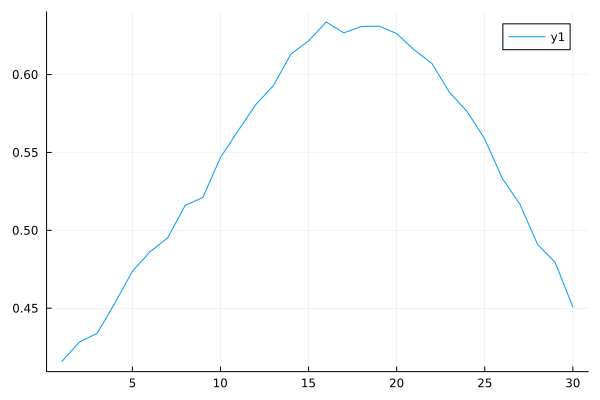

In [323]:
plot(mean(interp_samps50_1000, dims=1)[1,:])

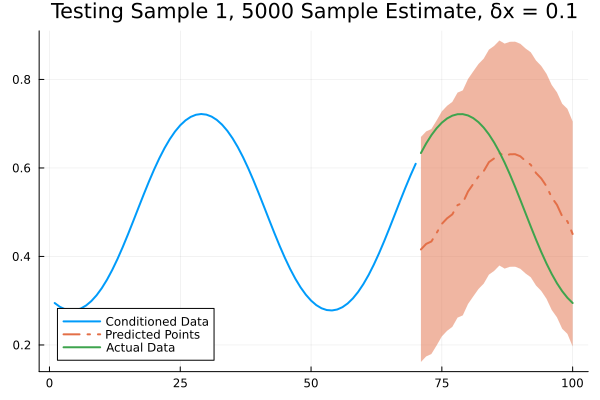

In [325]:
plot(collect(1:70), class_0_test_samples[15,1:70], lw=2, label="Conditioned Data", title="Testing Sample 1, 5000 Sample Estimate, δx = 0.1", legend=:bottomleft)
plot!(collect(71:100), mean(interp_samps50_1000, dims=1)[1,:], ribbon=std(interp_samps50_1000, dims=1), label="Predicted Points", ls=:dashdot, lw=2)
plot!(collect(71:100), class_0_test_samples[15, 71:100], label="Actual Data", lw=2)